In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg


%matplotlib inline

In [2]:
df=pd.read_excel('Angul-Copy1.xlsx')
df.drop(['District','Total'],axis=1,inplace=True)

df.columns = df.columns[[0]].tolist() + list(range(1,13))
s = df.melt('YEAR')
s['YEAR-month'] = s[['YEAR','variable']].astype(str).agg('-'.join, 1)

s

s

s.drop(['YEAR'],axis=1,inplace=True)

s

s.drop(['variable'],axis=1,inplace=True)

s

columns_titles = ["YEAR-month","value"]
s=s.reindex(columns=columns_titles)

s

s.rename(columns ={'YEAR-month':'Date'}, inplace = True)

s

s.sort_values('Date')

s['Date'] = pd.to_datetime(s['Date'])

s

s=s.sort_values(by='Date')
s.set_index("Date", inplace = True)
s.head()

,value
Date,
1994-01-01,0.0000
1994-02-01,19.8875
1994-03-01,3.1250
1994-04-01,24.3750
1994-05-01,39.1625


In [3]:
s.isnull().sum()

value    0
dtype: int64

In [4]:
s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336 entries, 1994-01-01 to 2021-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   336 non-null    float64
dtypes: float64(1)
memory usage: 5.2 KB


<AxesSubplot:xlabel='Date'>

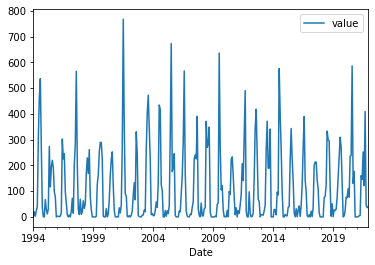

In [5]:
s.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [8]:
adf_test(s['value'])

ADF Statistics: -5.377565848867494
p- value: 3.7747544508773305e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [9]:
## Use Techniques Differencing
s['rainfall First Difference']=s['value']-s['value'].shift(1)

In [10]:
s.head()

,value,rainfall First Difference
Date,,
1994-01-01,0.0000,NaN
1994-02-01,19.8875,19.8875
1994-03-01,3.1250,-16.7625
1994-04-01,24.3750,21.2500
1994-05-01,39.1625,14.7875


In [11]:
adf_test(s['rainfall First Difference'].dropna())

ADF Statistics: -17.716085343207652
p- value: 3.484962282199383e-30
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [12]:
## Use Techniques Differencing
s['rainfall Second Difference']=s['rainfall First Difference']-s['rainfall First Difference'].shift(1)

In [13]:
adf_test(s['rainfall Second Difference'].dropna())

ADF Statistics: -11.053273627394486
p- value: 5.017585857249283e-20
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [14]:
### 12 months 
## Use Techniques Differencing
s['rainfall 12 Difference']=s['value']-s['value'].shift(12)

In [15]:
adf_test(s['rainfall 12 Difference'].dropna())

ADF Statistics: -9.249646469498472
p- value: 1.504294670933351e-15
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

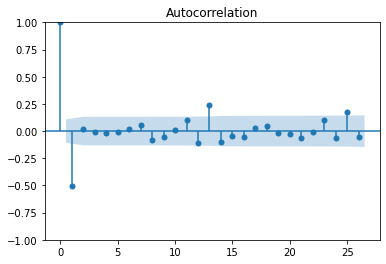

In [17]:
acf = plot_acf(s["rainfall Second Difference"].dropna())

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


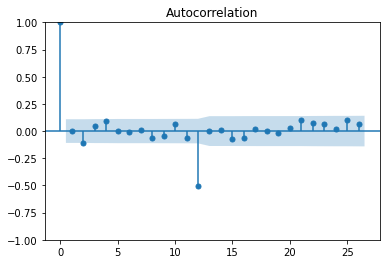

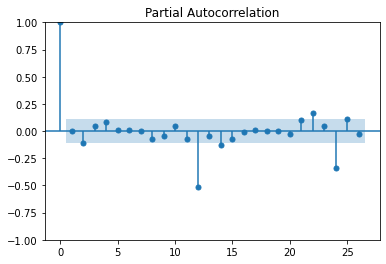

In [18]:
acf12 = plot_acf(s["rainfall 12 Difference"].dropna())
pacf12 = plot_pacf(s["rainfall 12 Difference"].dropna())

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


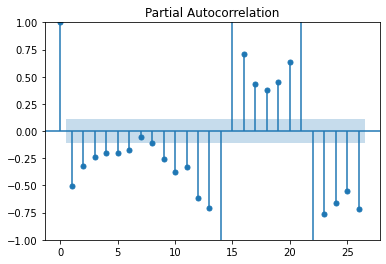

In [19]:
result = plot_pacf(s["rainfall Second Difference"].dropna())

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


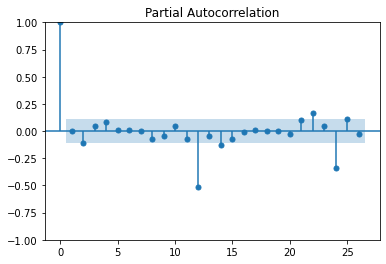

In [20]:
pacf12 = plot_pacf(s["rainfall 12 Difference"].dropna())

In [21]:
### split train and test data
s

,value,rainfall First Difference,rainfall Second Difference,rainfall 12 Difference
Date,,,,
1994-01-01,0.0000,NaN,NaN,NaN
1994-02-01,19.8875,19.8875,NaN,NaN
1994-03-01,3.1250,-16.7625,-36.6500,NaN
1994-04-01,24.3750,21.2500,38.0125,NaN
1994-05-01,39.1625,14.7875,-6.4625,NaN
...,...,...,...,...
2021-08-01,121.3500,-131.0500,-237.7750,-465.1250
2021-09-01,409.2000,287.8500,418.9000,279.3750
2021-10-01,46.6375,-362.5625,-650.4125,-129.4500


In [22]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2018,12,1)
test_dataset_end=datetime(2021,12,1)

In [23]:
train_data=s[:train_dataset_end]
test_data=s[train_dataset_end+timedelta(days=1):test_dataset_end]

In [24]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [25]:
test_data

,value,rainfall First Difference,rainfall Second Difference,rainfall 12 Difference
Date,,,,
2019-01-01,0.4000,-50.5625,-98.8250,0.4000
2019-02-01,27.0000,26.6000,77.1625,27.0000
2019-03-01,24.6500,-2.3500,-28.9500,24.5500
2019-04-01,30.1500,5.5000,7.8500,-44.1875
2019-05-01,75.9500,45.8000,40.3000,-4.1125
2019-06-01,151.1000,75.1500,29.3500,27.6750
2019-07-01,226.5500,75.4500,0.3000,-106.5875
2019-08-01,309.4000,82.8500,7.4000,10.0875
2019-09-01,270.8125,-38.5875,-121.4375,-24.2250


In [26]:
# from pmdarima.arima import auto_arima
# stepwise_model = auto_arima(s, start_p=1, start_q=1,
#                            max_p=3, max_q=3, m=12,
#                            start_P=0, seasonal=True,
#                            d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)
# print(stepwise_model.aic())

In [27]:
## create a ARIMA model
model_ARIMA = sms.tsa.arima.ARIMA(train_data['value'], order=(5,2,0))
model_Arima_fit = model_ARIMA.fit()
model_Arima_fit.summary()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  300
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -1911.666
Date:                Fri, 22 Jul 2022   AIC                           3835.332
Time:                        10:22:04   BIC                           3857.514
Sample:                    01-01-1994   HQIC                          3844.211
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7668      0.045    -17.050      0.000      -0.855      -0.679
ar.L2         -0.6508      0.075     -8.698      0.000      -0.797      -0.504
ar.L3         -0.4675      0.084     -5.590      0.000      -0.631      -0.304
ar.L4         -0.3598      0.121     -2.970      0.003      -0.597      -0.122
ar.L5         -0.1908      0.117     -1.626      0.104      -0.421       0.039
sigma2      2.192e+04   1330.521     16.474      0.000    1.93e+04    2.45e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):               223.33
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.85
Prob(H) (two-sided):                  0.71   Kurtosis:                         6.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
train_data

,value,rainfall First Difference,rainfall Second Difference,rainfall 12 Difference
Date,,,,
1994-01-01,0.0000,NaN,NaN,NaN
1994-02-01,19.8875,19.8875,NaN,NaN
1994-03-01,3.1250,-16.7625,-36.6500,NaN
1994-04-01,24.3750,21.2500,38.0125,NaN
1994-05-01,39.1625,14.7875,-6.4625,NaN
...,...,...,...,...
2018-08-01,299.3125,-33.8250,-243.5375,86.2625
2018-09-01,295.0375,-4.2750,29.5500,151.3875
2018-10-01,114.2875,-180.7500,-176.4750,5.1625


In [29]:
model_ARIMA=sms.tsa.arima.ARIMA(train_data['value'],order=(0,2,23))

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  300
Model:                ARIMA(0, 2, 23)   Log Likelihood               -1807.335
Date:                Fri, 22 Jul 2022   AIC                           3662.670
Time:                        10:22:15   BIC                           3751.400
Sample:                    01-01-1994   HQIC                          3698.188
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.4598      0.106    -13.740      0.000      -1.668      -1.252
ma.L2          0.0343      0.296      0.116      0.908      -0.546       0.615
ma.L3          0.3377      0.172      1.959      0.050      -0.000       0.675
ma.L4         -0.0582      0.344     -0.169      0.866      -0.733       0.616
ma.L5          0.0714      0.305      0.234      0.815      -0.526       0.669
ma.L6          0.1736      0.257      0.676      0.499      -0.330       0.677
ma.L7          0.0061      0.365      0.017      0.987      -0.710       0.722
ma.L8         -0.0355      0.243     -0.146      0.884      -0.511       0.440
ma.L9          0.0330      0.255      0.129      0.897      -0.467       0.533
ma.L10         0.0231      0.341      0.068      0.946      -0.645       0.691
ma.L11        -0.1621      0.175     -0.927      0.354      -0.505       0.181
ma.L12        -0.1350      0.303     -0.446      0.656      -0.728       0.458
ma.L13         0.4466      0.291      1.535      0.125      -0.124       1.017
ma.L14        -0.2317      0.174     -1.328      0.184      -0.574       0.110
ma.L15        -0.3705      0.263     -1.407      0.160      -0.887       0.146
ma.L16         0.0363      0.225      0.161      0.872      -0.405       0.477
ma.L17         0.2757      0.219      1.258      0.208      -0.154       0.705
ma.L18         0.1948      0.259      0.752      0.452      -0.313       0.702
ma.L19        -0.0216      0.238     -0.091      0.928      -0.489       0.445
ma.L20         0.1360      0.181      0.753      0.451      -0.218       0.490
ma.L21        -0.2688      0.214     -1.256      0.209      -0.688       0.151
ma.L22        -0.2409      0.179     -1.348      0.178      -0.591       0.109
ma.L23         0.2185      0.112      1.953      0.051      -0.001       0.438
sigma2      1.355e+04   3270.091      4.142      0.000    7136.678       2e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):               526.68
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             1.50
Prob(H) (two-sided):                  0.37   Kurtosis:                         8.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
test_data

,value,rainfall First Difference,rainfall Second Difference,rainfall 12 Difference
Date,,,,
2019-01-01,0.4000,-50.5625,-98.8250,0.4000
2019-02-01,27.0000,26.6000,77.1625,27.0000
2019-03-01,24.6500,-2.3500,-28.9500,24.5500
2019-04-01,30.1500,5.5000,7.8500,-44.1875
2019-05-01,75.9500,45.8000,40.3000,-4.1125
2019-06-01,151.1000,75.1500,29.3500,27.6750
2019-07-01,226.5500,75.4500,0.3000,-106.5875
2019-08-01,309.4000,82.8500,7.4000,10.0875
2019-09-01,270.8125,-38.5875,-121.4375,-24.2250


In [33]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2019-01-01 00:00:00
2021-12-01 00:00:00


In [34]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['value']-pred

In [35]:
pred

2019-01-01     53.201484
2019-02-01     37.965092
2019-03-01     57.360942
2019-04-01     88.249057
2019-05-01    141.782310
2019-06-01    203.497238
2019-07-01    215.162157
2019-08-01    225.035812
2019-09-01    203.562760
2019-10-01    185.224009
2019-11-01    123.413816
2019-12-01     35.049578
2020-01-01     31.511138
2020-02-01     88.568660
2020-03-01    182.932786
2020-04-01    220.649884
2020-05-01    221.026790
2020-06-01    205.402625
2020-07-01    163.297138
2020-08-01    171.905011
2020-09-01    183.844821
2020-10-01    179.525533
2020-11-01    180.512677
2020-12-01    181.499821
2021-01-01    182.486965
2021-02-01    183.474109
2021-03-01    184.461252
2021-04-01    185.448396
2021-05-01    186.435540
2021-06-01    187.422684
2021-07-01    188.409828
2021-08-01    189.396972
2021-09-01    190.384115
2021-10-01    191.371259
2021-11-01    192.358403
2021-12-01    193.345547
Freq: MS, Name: predicted_mean, dtype: float64

In [36]:
residuals

Date
2019-01-01    -52.801484
2019-02-01    -10.965092
2019-03-01    -32.710942
2019-04-01    -58.099057
2019-05-01    -65.832310
2019-06-01    -52.397238
2019-07-01     11.387843
2019-08-01     84.364188
2019-09-01     67.249740
2019-10-01    -46.349009
2019-11-01   -123.413816
2019-12-01    -31.399578
2020-01-01     -6.948638
2020-02-01    -12.118660
2020-03-01   -108.857786
2020-04-01   -110.687384
2020-05-01   -144.176790
2020-06-01     30.109875
2020-07-01     74.777862
2020-08-01    414.569989
2020-09-01    -54.019821
2020-10-01     -3.438033
2020-11-01   -180.512677
2020-12-01   -181.499821
2021-01-01   -182.486965
2021-02-01   -182.849109
2021-03-01   -180.061252
2021-04-01   -179.848396
2021-05-01    -26.023040
2021-06-01    -41.747684
2021-07-01     63.990172
2021-08-01    -68.046972
2021-09-01    218.815885
2021-10-01   -144.733759
2021-11-01   -156.595903
2021-12-01   -153.570547
dtype: float64

<AxesSubplot:ylabel='Density'>

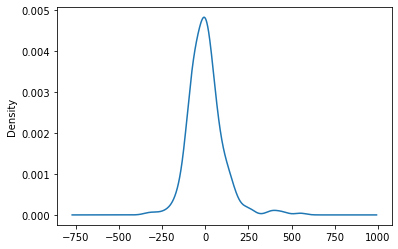

In [37]:
model_Arima_fit.resid.plot(kind='kde')

In [38]:
test_data['Predicted_ARIMA']=pred

C:\Users\asus\AppData\Local\Temp/ipykernel_8780/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Date'>

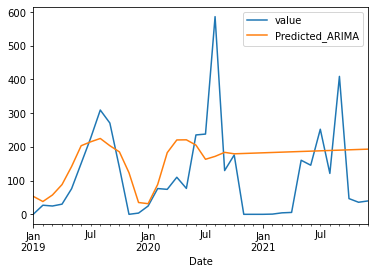

In [39]:
test_data[['value','Predicted_ARIMA']].plot()


C:\Users\asus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


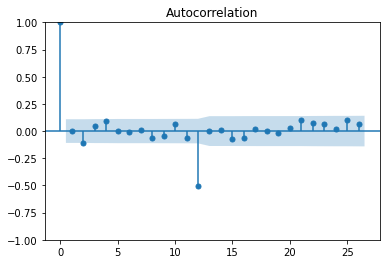

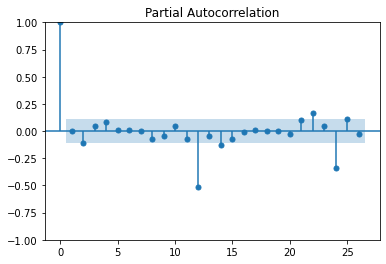

In [40]:
acf12 = plot_acf(s["rainfall 12 Difference"].dropna())
pacf12 = plot_pacf(s["rainfall 12 Difference"].dropna())

In [41]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
model_SARIMA=SARIMAX(train_data['value'],order=(1,0,3),seasonal_order=(1,1,1,12))

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
model_SARIMA_fit=model_SARIMA.fit()

In [44]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                  300
Model:             SARIMAX(1, 0, 3)x(1, 1, [1], 12)   Log Likelihood               -1671.696
Date:                              Fri, 22 Jul 2022   AIC                           3357.393
Time:                                      10:22:19   BIC                           3383.033
Sample:                                  01-01-1994   HQIC                          3367.668
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3379      1.836      0.184      0.854      -3.261       3.936
ma.L1         -0.2878      1.835     -0.157      0.875      -3.885       3.310
ma.L2         -0.1617      0.116     -1.394      0.163      -0.389       0.066
ma.L3          0.1102      0.266      0.414      0.679      -0.412       0.632
ar.S.L12      -0.1958      0.043     -4.540      0.000      -0.280      -0.111
ma.S.L12      -0.9992      3.836     -0.260      0.794      -8.517       6.519
sigma2      5561.8186   2.12e+04      0.262      0.793    -3.6e+04    4.72e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               885.71
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             1.66
Prob(H) (two-sided):                  0.07   Kurtosis:                        10.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
test_data.tail()

,value,rainfall First Difference,rainfall Second Difference,rainfall 12 Difference,Predicted_ARIMA
Date,,,,,
2021-08-01,121.3500,-131.0500,-237.7750,-465.1250,189.396972
2021-09-01,409.2000,287.8500,418.9000,279.3750,190.384115
2021-10-01,46.6375,-362.5625,-650.4125,-129.4500,191.371259
2021-11-01,35.7625,-10.8750,351.6875,35.7625,192.358403
2021-12-01,39.7750,4.0125,14.8875,39.7750,193.345547


In [46]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2019-01-01 00:00:00
2021-12-01 00:00:00


In [47]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2018,1,1),end=datetime(2021,12,1))
residuals=test_data['value']-pred_Sarima

<AxesSubplot:xlabel='Date'>

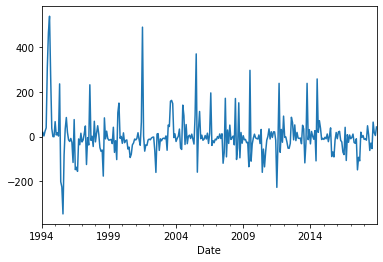

In [48]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

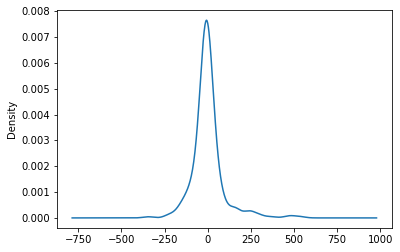

In [49]:
model_SARIMA_fit.resid.plot(kind='kde')

In [50]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\asus\AppData\Local\Temp/ipykernel_8780/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [51]:
test_data

,value,rainfall First Difference,rainfall Second Difference,rainfall 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Date,,,,,,
2019-01-01,0.4000,-50.5625,-98.8250,0.4000,53.201484,18.058280
2019-02-01,27.0000,26.6000,77.1625,27.0000,37.965092,6.003890
2019-03-01,24.6500,-2.3500,-28.9500,24.5500,57.360942,21.292377
2019-04-01,30.1500,5.5000,7.8500,-44.1875,88.249057,14.615436
2019-05-01,75.9500,45.8000,40.3000,-4.1125,141.782310,61.222819
2019-06-01,151.1000,75.1500,29.3500,27.6750,203.497238,205.318501
2019-07-01,226.5500,75.4500,0.3000,-106.5875,215.162157,338.803673
2019-08-01,309.4000,82.8500,7.4000,10.0875,225.035812,325.203301
2019-09-01,270.8125,-38.5875,-121.4375,-24.2250,203.562760,204.994631


<AxesSubplot:xlabel='Date'>

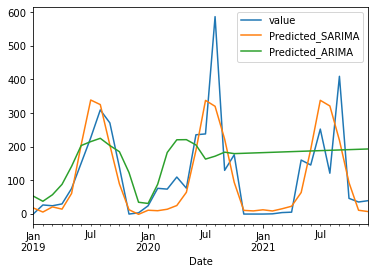

In [52]:
test_data[['value','Predicted_SARIMA','Predicted_ARIMA']].plot()

In [62]:
model2 = SARIMAX(train_data['value'],order=(1,0,3),seasonal_order=(1,1,1,12))
result2 = model2.fit()
s.tail()
future_pred=pd.date_range(start='2021-12-1',end='2024-12-1')
pred2=result2.predict(start=len(s),end=len(s)+35,typ='levels')

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [71]:
pred2.to_excel('Angul_pred.xlsx')
pred2

2022-01-01     12.397446
2022-02-01      9.300133
2022-03-01     15.399902
2022-04-01     23.655988
2022-05-01     64.056546
2022-06-01    191.718622
2022-07-01    337.837857
2022-08-01    320.922348
2022-09-01    219.842622
2022-10-01     93.541012
2022-11-01     11.217128
2022-12-01      7.753049
2023-01-01     12.447845
2023-02-01      9.270784
2023-03-01     15.452366
2023-04-01     23.575496
2023-05-01     64.031316
2023-06-01    191.839707
2023-07-01    337.846456
2023-08-01    320.960463
2023-09-01    219.710423
2023-10-01     93.504541
2023-11-01     11.232110
2023-12-01      7.677063
2024-01-01     12.437979
2024-02-01      9.276530
2024-03-01     15.442095
2024-04-01     23.591253
2024-05-01     64.036255
2024-06-01    191.816004
2024-07-01    337.844773
2024-08-01    320.953002
2024-09-01    219.736302
2024-10-01     93.511681
2024-11-01     11.229177
2024-12-01      7.691938
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

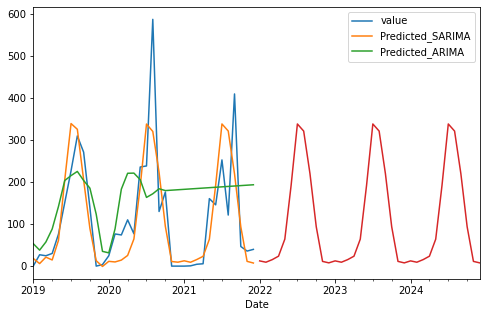

In [78]:
# test_data['SARIMA_pred']=pred2
plt.rcParams['figure.figsize'] = [8, 5]
# plt.title("Amount of rainfall in the year 2019-2021")
# plt.xlabel('Year')
# plt.ylabel('Rain(in mm)')
# plt.plot(test_data)
# plt.plot(pred2)
test_data[['value','Predicted_SARIMA','Predicted_ARIMA']].plot()
pred2.plot()

In [65]:
# from sklearn.metrics import r2_score
# r2_score(test_data,pred2)

In [66]:
# import sqlite3
# read=pd.read_excel('Angul_pred.xlsx')
# read

,Unnamed: 0,predicted_mean
0,2022-01-01,12.397446
1,2022-02-01,9.300133
2,2022-03-01,15.399902
3,2022-04-01,23.655988
4,2022-05-01,64.056546
5,2022-06-01,191.718622
6,2022-07-01,337.837857
7,2022-08-01,320.922348
8,2022-09-01,219.842622
9,2022-10-01,93.541012


In [67]:
# conn = sqlite3.connect('Angul_pred.db')

In [68]:
# create_sql="CREATE TABLE IF NOT EXISTS rainfall(Date DATE, Rain INTEGER)"
# cur = conn.cursor()
# cur.execute(create_sql)

In [69]:
# for row in read.itertuples():
#     insert_sql=f"INSERT INTO rainfall (Date,Rain) VALUES ('{row[1]}','{row[2]}')"
#     cur.execute(insert_sql)

In [70]:
# conn.commit()